In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
aapl = yf.Ticker('AAPL').history(period="13mo")
sp500 = yf.Ticker('^GSPC').history(period="13mo")

aapl = aapl.reset_index()
sp500 = sp500.reset_index()

In [3]:
aapl = aapl[['Date','Close']]
aapl['Close_lag'] = aapl['Close'] - aapl['Close'].shift()
aapl.head(2)

,Date,Close,Close_lag
0,2022-08-30 00:00:00-04:00,157.972855,NaN
1,2022-08-31 00:00:00-04:00,156.292801,-1.680054


In [4]:
aapl.tail(2)

,Date,Close,Close_lag
271,2023-09-28 00:00:00-04:00,170.690002,0.260010
272,2023-09-29 00:00:00-04:00,171.210007,0.520004


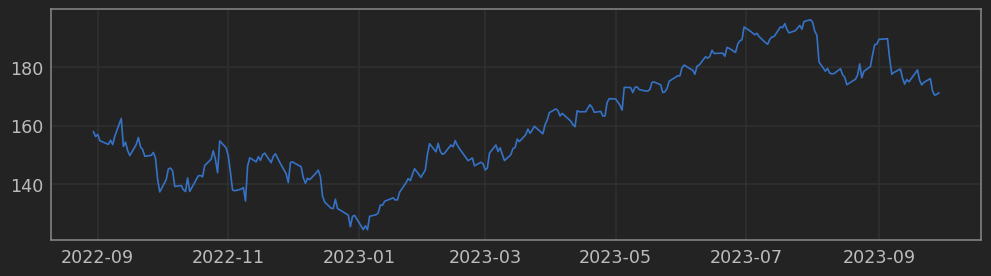

In [5]:
plt.figure(figsize=(12,3))
plt.plot(aapl['Date'], aapl['Close']);

In [6]:
sp500 = sp500[['Date','Close']]
sp500['Close_lag'] = sp500['Close'] - sp500['Close'].shift()
sp500.head(2)

,Date,Close,Close_lag
0,2022-08-30 00:00:00-04:00,3986.159912,NaN
1,2022-08-31 00:00:00-04:00,3955.000000,-31.159912


In [7]:
sp500.tail(2)

,Date,Close,Close_lag
271,2023-09-28 00:00:00-04:00,4299.700195,25.190430
272,2023-09-29 00:00:00-04:00,4288.049805,-11.650391


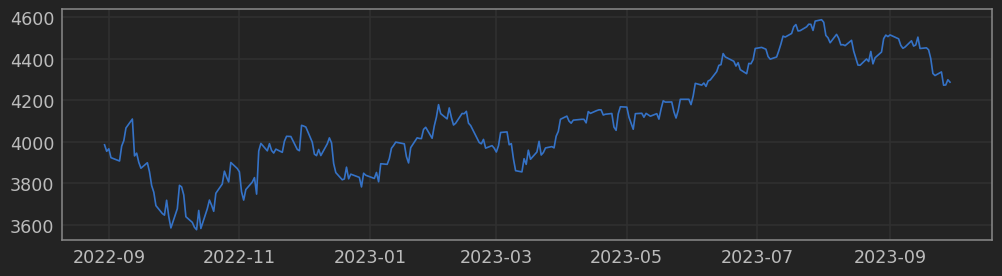

In [8]:
plt.figure(figsize=(12,3))
plt.plot(sp500['Date'], sp500['Close']);

In [9]:
# select apple stock for a date range
# make aapl series 60 days shorter than sp500
s1 = aapl[['Date','Close_lag']].iloc[30:-30] 
print(s1.shape)
s1.tail()

(213, 2)


,Date,Close_lag
238,2023-08-11 00:00:00-04:00,0.059998
239,2023-08-14 00:00:00-04:00,1.670013
240,2023-08-15 00:00:00-04:00,-2.010010
241,2023-08-16 00:00:00-04:00,-0.879990
242,2023-08-17 00:00:00-04:00,-2.570007


In [10]:
s2 = sp500[['Date','Close_lag']] #.iloc[1:] # just remove NaN 
print(s2.shape)
s2.tail()

(273, 2)


,Date,Close_lag
268,2023-09-25 00:00:00-04:00,17.379883
269,2023-09-26 00:00:00-04:00,-63.910156
270,2023-09-27 00:00:00-04:00,0.979980
271,2023-09-28 00:00:00-04:00,25.190430
272,2023-09-29 00:00:00-04:00,-11.650391


In [19]:
corr = [
    np.correlate(s1['Close_lag'], s2['Close_lag'].iloc[60-i:272-i], mode='valid')[0] \
    for i in range(0,65,5)
]
corr  = [c*c for c in corr] # make it positive, thsi will also make it very large

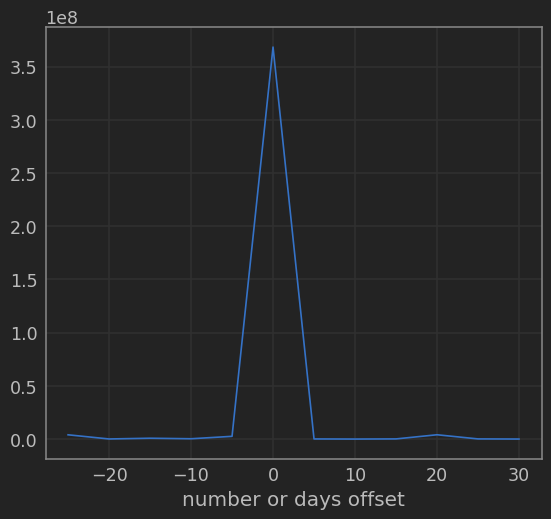

In [20]:
plt.plot([30-i for i in range(0,65,5)], corr);
plt.xlabel('number or days offset');